# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Dataset Link**

https://drive.google.com/file/d/1BWShlH4iXejVF8TglxSlLRYg5qf6zNWX/view?usp=sharing

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

To segment online retail customers using RFM (Recency, Frequency, Monetary) analysis and clustering techniques to enable targeted marketing strategies that enhance customer engagement and business revenue.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [51]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Dataset Loading

In [52]:
# Load Dataset

df = pd.read_csv(' data.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Dataset First View

In [53]:
# Dataset First Look

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [54]:
# Dataset Rows & Columns count

df.shape

(541909, 8)

### Dataset Information

In [55]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [56]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [57]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


### What did you know about your dataset?

* It contains 541909 rows and 8 columns.
* The columns are: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.
* The Description column has 1454 missing values.
* The CustomerID column has 135080 missing values.
* There are 5268 duplicate rows.
* The data types of the columns are: object for InvoiceNo, StockCode, Description, InvoiceDate, and Country, int64 for Quantity, and float64 for UnitPrice and CustomerID.

## ***2. Understanding Your Variables***

In [58]:
# Dataset Columns

df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [59]:
# Dataset Describe

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

* InvoiceNo	- Invoice number (can help detect returns if it starts with 'C')
* StockCode	- Product/item code
* Description	- Product name
* Quantity - Quantity of items purchased (can be negative for returns)
* InvoiceDate	- Date and time of invoice
* UnitPrice	- Price per item
* CustomerID	- Unique ID per customer (crucial for segmentation)
* Country	- Country of the customer

### Check Unique Values for each variable.

In [60]:
# Check Unique Values for each variable.

df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4220
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [61]:
# Write your code to make your dataset analysis ready.

# Changing customerid column datatype from int to object

df['CustomerID'] = df['CustomerID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [62]:
# Changing Invoicedate column datatype from object to datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [63]:
# Handling duplicate values

df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [64]:
# Handling missing/null values

df.dropna(inplace=True) # Dropping because the missing values are in small size compared to original data
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [65]:
# Adding total value column

df['Total Price'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [66]:
# Creating RFM dataframe

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
                                    'InvoiceNo': lambda x: len(x),
                                    'Total Price': lambda x: x.sum()})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18281.0,180,7,80.82
18282.0,7,13,176.60
18283.0,3,721,2045.53


In [67]:
# RFM describe

rfm.describe()

,Recency,Frequency,Monetary
count,4373.000000,4373.000000,4.373000e+03
mean,91.026298,122.384404,2.224104e+03
std,100.763317,2031.627631,2.335391e+04
min,0.000000,1.000000,-4.287630e+03
25%,16.000000,17.000000,2.918800e+02
50%,49.000000,41.000000,6.442400e+02
75%,142.000000,100.000000,1.610150e+03
max,373.000000,133583.000000,1.447488e+06


In [68]:
# Handling outliers

Q1 = rfm.quantile(0.25)
Q3 = rfm.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rfm= rfm[(rfm >= lower_bound) & (rfm <= upper_bound)]

rfm.shape

(4373, 3)

In [69]:
# Binning Recency, Frequency, Monetary

recency_labels = ['0-16', '17-49', '50-142', '142+']
frequency_labels = ['1-17', '18-41', '42-100', '100+']
monetary_labels = ['Negative', 'upto 500', '500+', '1000+'] # Adjusted monetary labels

# Define bin edges based on the actual data after outlier removal

recency_bins = [rfm['Recency'].min(), 17, 50, 143, rfm['Recency'].max()]
frequency_bins = [rfm['Frequency'].min(), 18, 42, 101, rfm['Frequency'].max()]
monetary_bins = [rfm['Monetary'].min(), 501, 1001, 2001, rfm['Monetary'].max()]

# Ensure bins are strictly increasing

recency_bins = sorted(list(set([0] + recency_bins))) # Add 0 and sort unique bins
frequency_bins = sorted(list(set([1] + frequency_bins))) # Add 1 and sort unique bins
monetary_bins = sorted(list(set([rfm['Monetary'].min()] + monetary_bins))) # Add min monetary and sort unique bins

# Replace the last bin edge with infinity to include all values

recency_bins[-1] = np.inf
frequency_bins[-1] = np.inf
monetary_bins[-1] = np.inf


rfm['Recency_bins'] = pd.cut(rfm['Recency'], bins = recency_bins, labels = recency_labels, include_lowest = True, right=False) # Adjusted bins and added right=False
rfm['Frequency_bins'] = pd.cut(rfm['Frequency'], bins = frequency_bins, labels = frequency_labels, include_lowest = True, right=False) # Adjusted bins and added right=False
rfm['Monetary_bins'] = pd.cut(rfm['Monetary'], bins = monetary_bins, labels = monetary_labels, include_lowest = True) # Adjusted bins

rfm

,Recency,Frequency,Monetary,Recency_bins,Frequency_bins,Monetary_bins
CustomerID,,,,,,
12346.0,325.0,2.0,0.00,142+,1-17,Negative
12347.0,1.0,182.0,NaN,0-16,100+,NaN
12348.0,74.0,31.0,1797.24,50-142,18-41,500+
12349.0,18.0,73.0,1757.55,17-49,42-100,500+
12350.0,309.0,17.0,334.40,142+,1-17,Negative
...,...,...,...,...,...,...
18281.0,180.0,7.0,80.82,142+,1-17,Negative
18282.0,7.0,13.0,176.60,0-16,1-17,Negative
18283.0,3.0,NaN,2045.53,0-16,NaN,1000+


In [70]:
# Most popular products with repect to quantity sold

popular_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
popular_products.head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
JUMBO BAG RED RETROSPOT,47260
POPCORN HOLDER,36322
ASSORTED COLOUR BIRD ORNAMENT,36282
PACK OF 72 RETROSPOT CAKE CASES,36016
WHITE HANGING HEART T-LIGHT HOLDER,35298
RABBIT NIGHT LIGHT,30631
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26299


In [71]:
# Most Profitable products with respect to revenue

profitable_products = df.groupby('Description')['Total Price'].sum().sort_values(ascending=False)
profitable_products.head(10)

,Total Price
Description,
DOTCOM POSTAGE,206245.48
REGENCY CAKESTAND 3 TIER,164459.49
WHITE HANGING HEART T-LIGHT HOLDER,99612.42
PARTY BUNTING,98243.88
JUMBO BAG RED RETROSPOT,92175.79
RABBIT NIGHT LIGHT,66661.63
POSTAGE,66230.64
PAPER CHAIN KIT 50'S CHRISTMAS,63715.24
ASSORTED COLOUR BIRD ORNAMENT,58792.42


In [72]:
# Order distribution by country

order_distribution = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)
order_distribution

,InvoiceNo
Country,
United Kingdom,488846
Germany,9480
France,8541
EIRE,8184
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1994
Portugal,1510


In [73]:
# Average spend per order

rfm['AvgSpendPerOrder'] = rfm['Monetary'] / rfm['Frequency']
rfm[['Frequency', 'AvgSpendPerOrder']].head()

,Frequency,AvgSpendPerOrder
CustomerID,,
12346.0,2.0,0.000000
12347.0,182.0,NaN
12348.0,31.0,57.975484
12349.0,73.0,24.076027
12350.0,17.0,19.670588


In [74]:
# Count of customers with respect to Recency bins

rfm['Recency_bins'].value_counts()

,count
Recency_bins,
0-16,1132
50-142,1079
17-49,1074
142+,939


In [75]:
# Count of customers with respect to Frequency bins

rfm['Frequency_bins'].value_counts()

,count
Frequency_bins,
1-17,1113
42-100,1094
18-41,1077
100+,704


In [76]:
# Count of customers with respect to Monetary bins

rfm['Monetary_bins'].value_counts()

,count
Monetary_bins,
Negative,1836
upto 500,909
500+,756
1000+,450


In [77]:
# Merging RFM dataframe with main dataframe

df = df.merge(rfm, left_on='CustomerID', right_index=True, how='left')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Recency,Frequency,Monetary,Recency_bins,Frequency_bins,Monetary_bins,AvgSpendPerOrder
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,301.0,NaN,NaN,142+,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,301.0,NaN,NaN,142+,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,301.0,NaN,NaN,142+,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,301.0,NaN,NaN,142+,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,301.0,NaN,NaN,142+,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0.0,52.0,862.81,0-16,42-100,upto 500,16.5925
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0.0,52.0,862.81,0-16,42-100,upto 500,16.5925
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.0,52.0,862.81,0-16,42-100,upto 500,16.5925
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0.0,52.0,862.81,0-16,42-100,upto 500,16.5925


### What all manipulations have you done and insights you found?

* Changed the data type of 'CustomerID' column to object.
* Changed the data type of 'InvoiceDate' column to datetime.
* Handled duplicate values by dropping them.
* Handled missing/null values by dropping rows with missing values.
* Added a 'Total Price' column.
* **Created an RFM dataframe:** Grouped the data by 'CustomerID' and calculated Recency (days since last purchase), Frequency (total number of invoices), and Monetary (total spending) for each customer.
* Examined the descriptive statistics of the RFM dataframe.
* Handled outliers in the RFM dataframe using IQR method.
* Binned Recency, Frequency, and Monetary into categories.
* Calculated the count of customers within each Recency, Frequency, and Monetary bin.
* Calculated the most popular products by quantity sold.
* Calculated the most profitable products by revenue.
* Calculated the order distribution by country.
* Calculated the average spend per order for each customer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

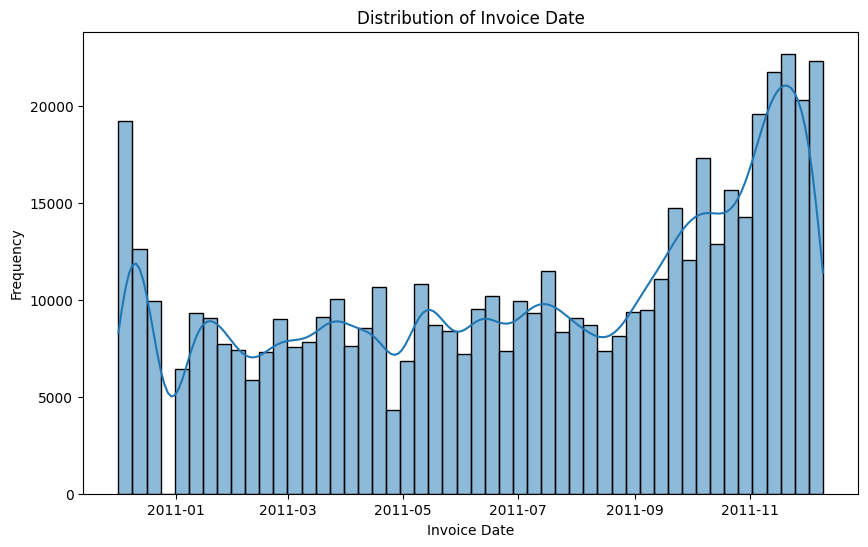

In [78]:
# Plot for distribution of invoice date

plt.figure(figsize=(10, 6))
sns.histplot(df['InvoiceDate'], bins=50, kde=True)
plt.title('Distribution of Invoice Date')
plt.xlabel('Invoice Date')
plt.ylabel('Frequency')
plt.show()

Based on the histogram of the invoice dates, it appears that the sales activity is not evenly distributed throughout the year. There's a noticeable increase in the number of invoices towards the end of the dataset's time period. This suggests a potential seasonality in sales, with higher activity in the later months.

#### Chart - 2

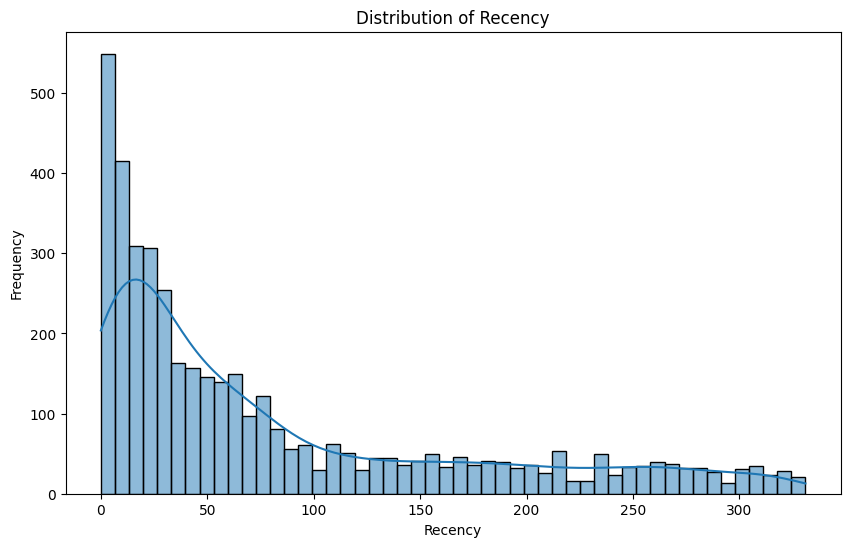

In [79]:
# Plot for distribution of Recency

plt.figure(figsize=(10, 6))
sns.histplot(rfm['Recency'], bins=50, kde=True)
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

Analyzing the distribution of Recency , we can see that a significant portion of customers have a low Recency value. This indicates that a large number of customers have made a purchase recently. There is also a tail extending to higher Recency values, suggesting there are customers who haven't made a purchase in a longer time.

#### Chart - 3

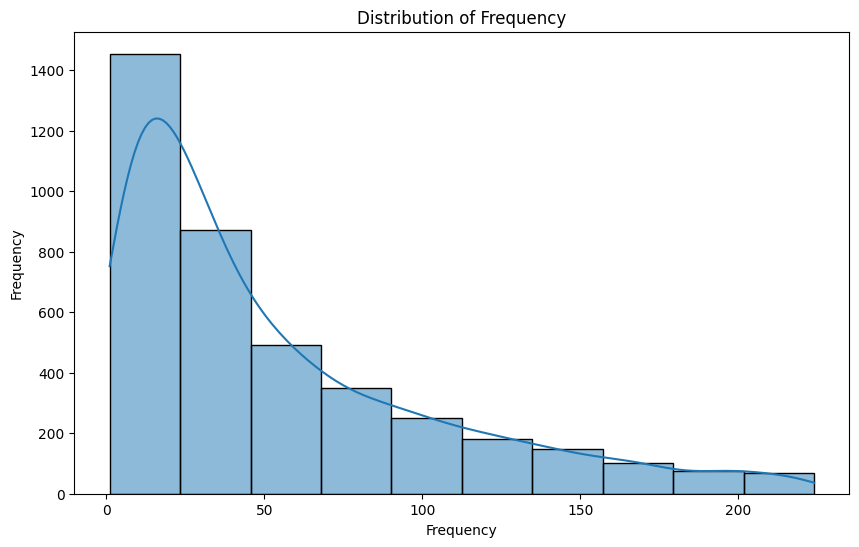

In [80]:
# Plot for distribution of Frequency

plt.figure(figsize=(10, 6))
sns.histplot(rfm['Frequency'], bins=10, kde=True)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

Based on the histogram of Frequency , it is evident that the distribution is heavily skewed towards lower frequency values. This indicates that a large number of customers make infrequent purchases, while a smaller group of customers are high-frequency buyers.

#### Chart - 4

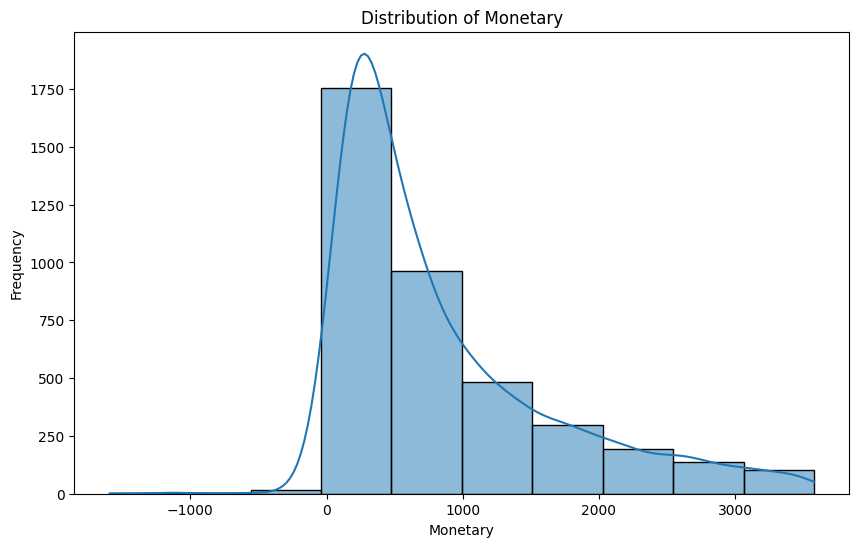

In [81]:
# Plot for distribution of Monetary

plt.figure(figsize=(10, 6))
sns.histplot(rfm['Monetary'], bins=10, kde=True)
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.show()

Based on the histogram of Monetary , it shows that the distribution is heavily skewed towards lower monetary values. This indicates that a large number of customers have made low-value purchases, while a smaller group of customers contribute significantly to the total revenue.

#### Chart - 5

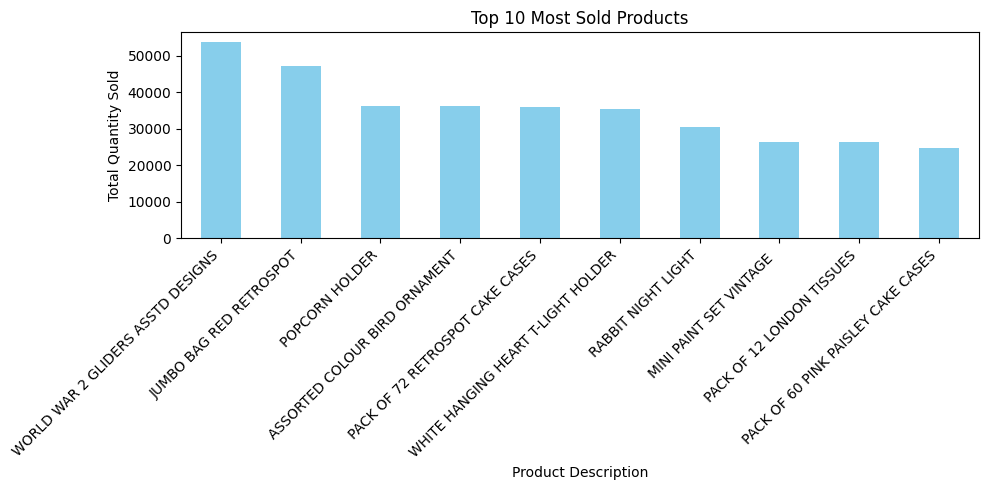

In [82]:
# Plot for most popular products

popular_products.head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Most Sold Products')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The insight from the chart is that "WORLD WAR 2 GLIDERS ASSTD DESIGNS" is the most popular product by a significant margin, followed by "JUMBO BAG RED RETROSPOT" and "POPCORN HOLDER". This indicates which products are driving the highest sales volume.

#### Chart - 6

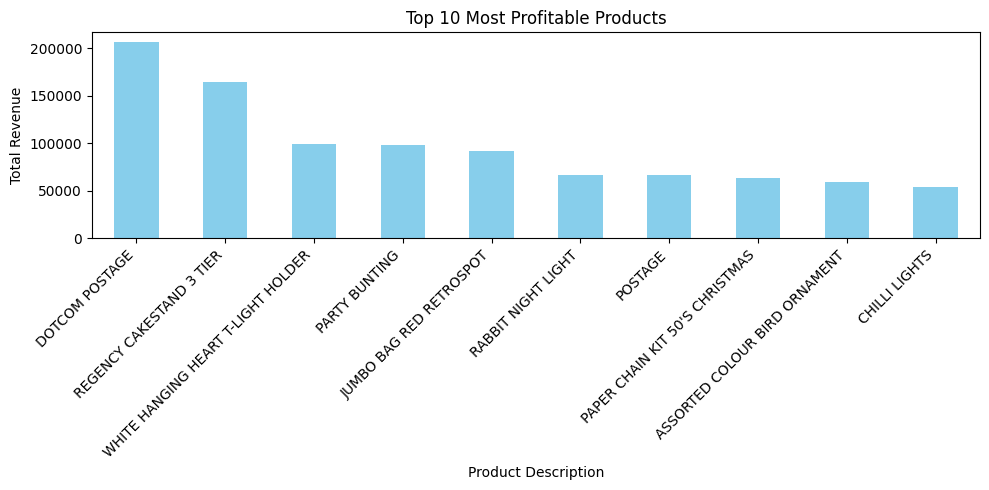

In [83]:
# Plot for most profitable products

profitable_products.head(10).plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 10 Most Profitable Products')
plt.ylabel('Total Revenue')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The key insight from the chart is that "DOTCOM POSTAGE" is the most profitable product, followed by "REGENCY CAKESTAND 3 TIER" and "WHITE HANGING HEART T-LIGHT HOLDER". This highlights the products that are contributing the most to the overall revenue.

#### Chart - 7

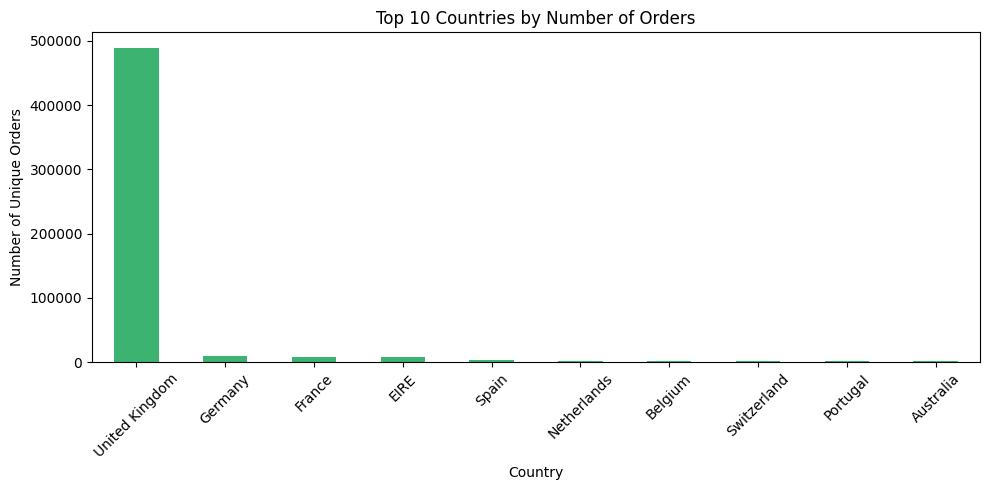

In [84]:
# Plot for distribution of orders per country

order_distribution.head(10).plot(kind='bar', figsize=(10, 5), color='mediumseagreen')
plt.title('Top 10 Countries by Number of Orders')
plt.ylabel('Number of Unique Orders')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The key insight from this chart is that the United Kingdom accounts for a significantly larger number of orders compared to any other country. This indicates that the majority of the customer base is located in the UK.

#### Chart - 8

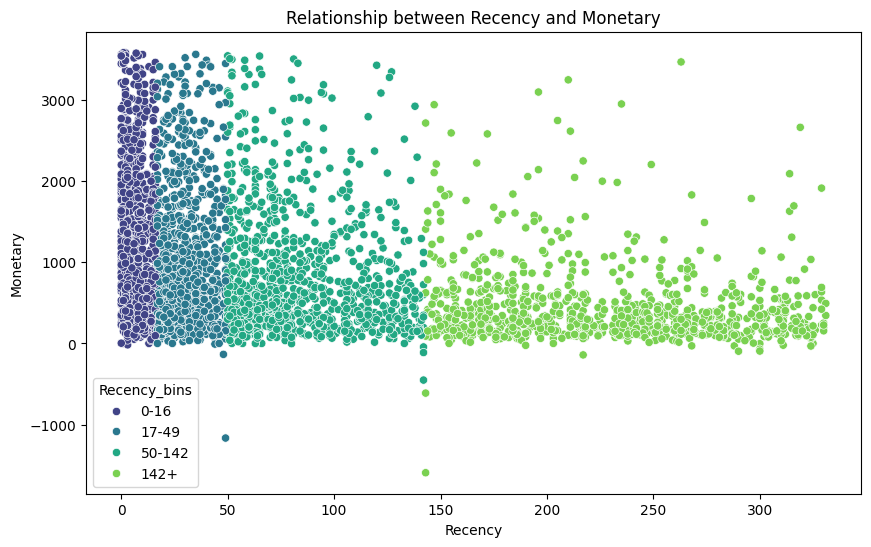

In [85]:
# Plot between recency and monetary

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', data=rfm, hue='Recency_bins', palette='viridis')
plt.title('Relationship between Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

The scatter plot reveals that customers with lower Recency (more recent purchases) tend to have a wide range of Monetary values, including some of the highest spenders. As Recency increases (longer since the last purchase), the Monetary values generally tend to be lower. The hue helps to visually separate customers based on their recency, making it easier to see the concentration of recent customers at various spending levels.

#### Chart - 9

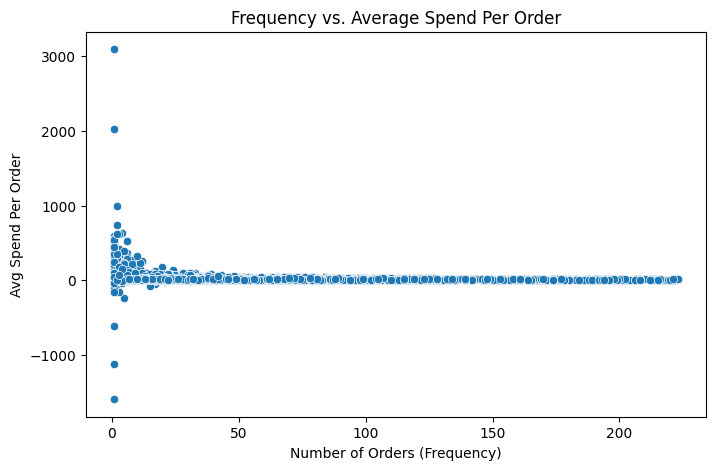

In [86]:
# Plot between frequency and average spend per order

plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Frequency', y='AvgSpendPerOrder')
plt.title('Frequency vs. Average Spend Per Order')
plt.xlabel('Number of Orders (Frequency)')
plt.ylabel('Avg Spend Per Order')
plt.show()

The scatter plot between Frequency and Average Spend Per Order shows that most customers have a low frequency and a relatively low average spend per order. There are some customers with high frequency, and their average spend per order varies. There are also customers with low frequency but a high average spend per order. This suggests different customer behaviors: some buy frequently but small amounts, others buy infrequently but large amounts, and some are both frequent and high-spending.

#### Chart - 10

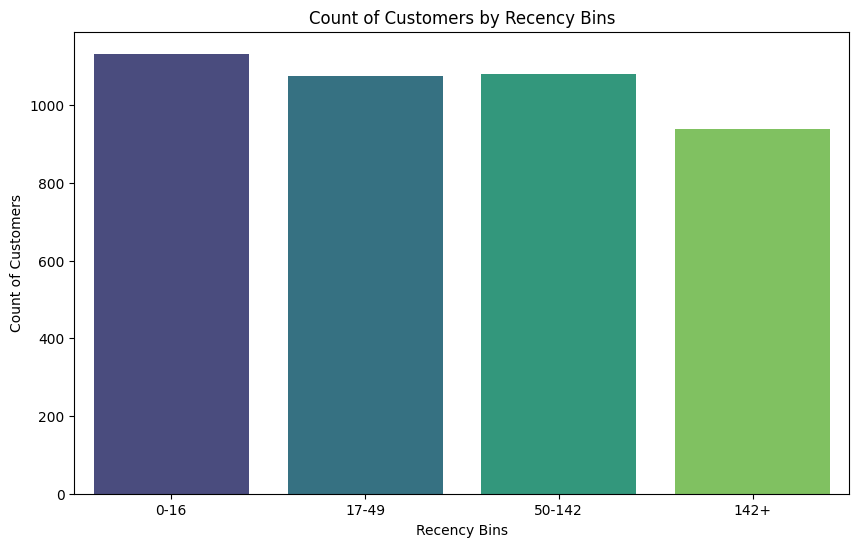

In [87]:
# Plot between Count of customers and recency bins

plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Recency_bins', palette='viridis', hue = 'Recency_bins', legend = False)
plt.title('Count of Customers by Recency Bins')
plt.xlabel('Recency Bins')
plt.ylabel('Count of Customers')
plt.show()

We can see the number of customers who have purchased most recently (0-16 days), those who purchased within the last 17-49 days, 50-142 days, and those who haven't purchased in over 142 days. The chart shows a relatively even distribution across the first three bins, with a slightly lower count in the "142+" bin. This indicates a healthy portion of recent customers, but also a significant number of customers who haven't purchased in a longer time.

#### Chart - 11

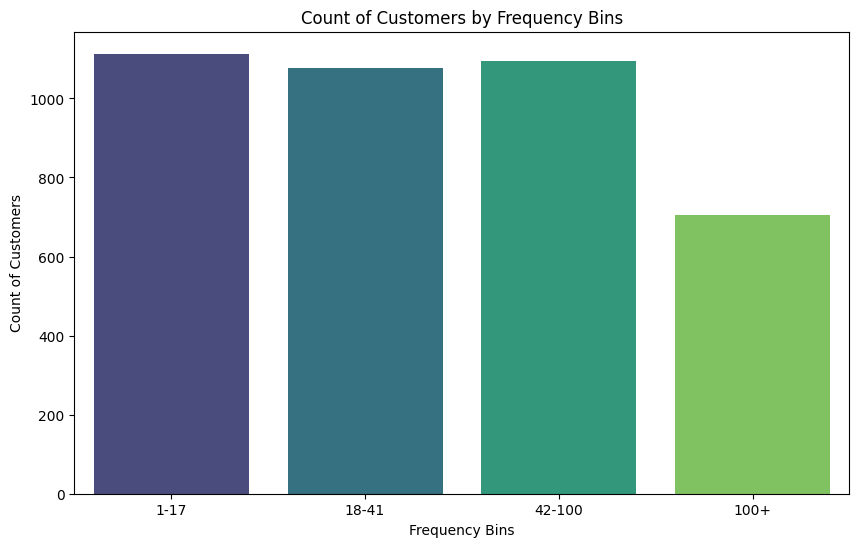

In [88]:
# Plot between Count of customers and Frequency bins

plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Frequency_bins', palette='viridis', hue = 'Frequency_bins', legend = False)
plt.title('Count of Customers by Frequency Bins')
plt.xlabel('Frequency Bins')
plt.ylabel('Count of Customers')
plt.show()

We can see the number of customers in each frequency category. The chart indicates that a large number of customers fall into the lower frequency bins (1-17 and 18-41), while fewer customers are in the higher frequency bins (42-100 and 100+). This aligns with the earlier observation that the Frequency distribution is skewed towards lower values.

#### Chart - 12

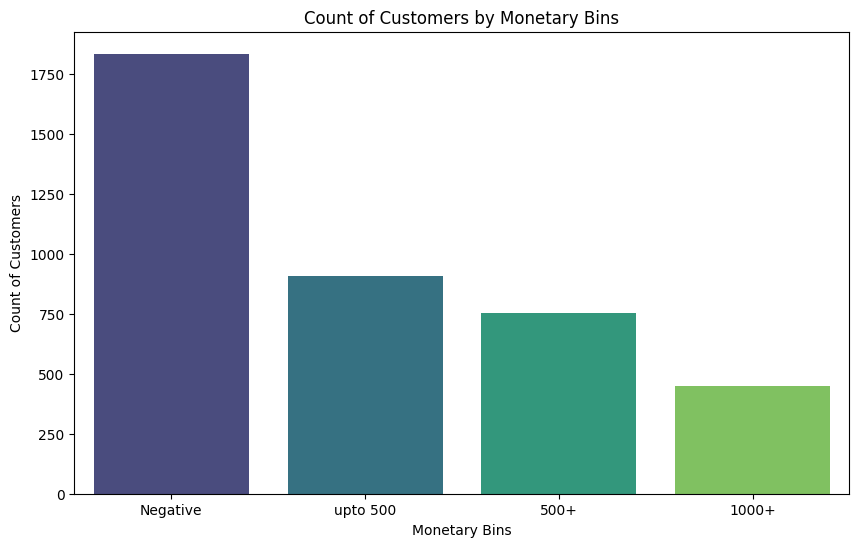

In [89]:
# Plot between Count of customers and Monetary bins

plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Monetary_bins', palette='viridis', hue = 'Monetary_bins', legend = False)
plt.title('Count of Customers by Monetary Bins')
plt.xlabel('Monetary Bins')
plt.ylabel('Count of Customers')
plt.show()

We can see the number of customers in each monetary category. The chart shows that a large number of customers fall into the "upto 500" monetary bin, while fewer customers are in the higher monetary bins ("500+", "1000+", and "2000+"). This indicates that the majority of customers are low-to-medium spenders, with a smaller number of high-value customers.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [90]:
# Handling Missing Values & Missing Value Imputation

# Drop rows with missing values in RFM columns (introduced after merging with outlier-removed RFM data)

df.dropna(subset=['Recency', 'Frequency', 'Monetary', 'AvgSpendPerOrder'], inplace=True)

# Verify missing values are handled

df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Total Price,0
Recency,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

* The reason for dropping these rows is that the missing values in the Recency, Frequency, Monetary, and AvgSpendPerOrder columns appeared after I removed outliers from the RFM dataframe and merged it with the original dataframe. These missing values correspond to the customers who were identified as outliers based on their RFM metrics.
* Since the goal is to perform customer segmentation based on RFM analysis and these outlier customers fall outside the typical range of behavior, including them (even with imputed values) could distort the clustering results and wouldn't be representative of the main customer segments we aim to identify for targeted marketing.

### 2. Handling Outliers

In [91]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were handled on the RFM features before merging. Rows corresponding to outliers were removed when handling missing values. No further outlier treatment is deemed necessary for RFM-based segmentation at this stage.

### 3. Feature Selection

In [92]:
# Select your features wisely to avoid overfitting

# Select the numerical RFM features for clustering

rfm_for_clustering = rfm[['Recency', 'Frequency', 'Monetary']]

# Display the first few rows

display(rfm_for_clustering.head())

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325.0,2.0,0.00
12347.0,1.0,182.0,NaN
12348.0,74.0,31.0,1797.24
12349.0,18.0,73.0,1757.55
12350.0,309.0,17.0,334.40


##### What all feature selection methods have you used  and why?

For this RFM-based customer segmentation task, the feature selection method used was primarily based on domain knowledge and the problem statement. The RFM model itself defines the key features relevant to customer behavior and value.

##### Which all features you found important and why?

I have explicitly selected the three core numerical RFM features:

* Recency
* Frequency
* Monetary

These features directly capture the recency of the last purchase, the frequency of purchases, and the total spending of each customer, which are the fundamental dimensions for RFM analysis and subsequent customer segmentation. No automated feature selection techniques (like correlation analysis, feature importance from models, etc.) were applied at this stage because the RFM framework inherently defines these features as the most relevant for this type of customer analysis.

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* Yes, the numerical RFM features (Recency, Frequency, and Monetary) need to be transformed because their distributions are highly skewed, as observed in the histograms.

* Clustering algorithms, especially distance-based ones like K-Means, perform better when features have a more symmetrical distribution and are on a similar scale.

* To address the skewness, I will use a logarithmic transformation. Specifically, I will use np.log1p() (which calculates log(1+x)) on the Recency, Frequency, and Monetary columns of the rfm_for_clustering dataframe.

* Transforming these skewed features will help the clustering algorithm to group customers more effectively based on their true behavioral patterns rather than being dominated by a few extreme values.

In [93]:
# Transform Your data - Log Transformation

# Apply log transformation to the numerical RFM features

rfm_transformed = rfm_for_clustering.apply(np.log1p)

# Display the first few rows of the transformed data

display(rfm_transformed.head())

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.786897,1.098612,0.000000
12347.0,0.693147,5.209486,NaN
12348.0,4.317488,3.465736,7.494564
12349.0,2.944439,4.304065,7.472245
12350.0,5.736572,2.890372,5.815324


### 5. Data Scaling

In [94]:
# Scaling your data

# Initialize the StandardScaler

scaler = StandardScaler()

# Fit and transform the transformed RFM data

rfm_scaled = scaler.fit_transform(rfm_transformed)

# Convert the scaled data back to a DataFrame (optional, but good for clarity)

rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=rfm_transformed.columns, index=rfm_transformed.index)

# Display the first few rows of the scaled data

display(rfm_scaled_df.head())

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.487550,-2.226700,-5.867501
12347.0,-2.067187,1.553993,NaN
12348.0,0.462104,-0.049701,1.118529
12349.0,-0.496095,0.721294,1.097725
12350.0,1.452430,-0.578853,-0.446768


##### Which method have you used to scale you data and why?

I have used the StandardScaler method to scale the transformed RFM data (rfm_transformed).

* StandardScaler removes the mean from each feature, centering the data around zero.
* It scales each feature to have a unit standard deviation.
* Clustering algorithms like K-Means are sensitive to the scale of the features because they calculate distances between data points. If features have different scales, features with larger values or wider ranges will have a disproportionately larger impact on the distance calculations. StandardScaler ensures that all features contribute equally to the distance computations, preventing features with larger scales from dominating the clustering process.
* Standardizing features using StandardScaler is a common and recommended preprocessing step before applying K-Means clustering.

### 6. Data Splitting

In [95]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

* For unsupervised learning tasks like K-Means clustering, data splitting into training and testing sets is generally not required.

* The objective of clustering is to identify inherent groupings or patterns within the entire dataset, not to build a model that predicts on unseen data (which is the purpose of train-test splitting in supervised learning). The clustering algorithm will be applied to the entire preprocessed dataset to discover the customer segments based on their RFM characteristics.

## ***7. ML Model Implementation***

### ML Model

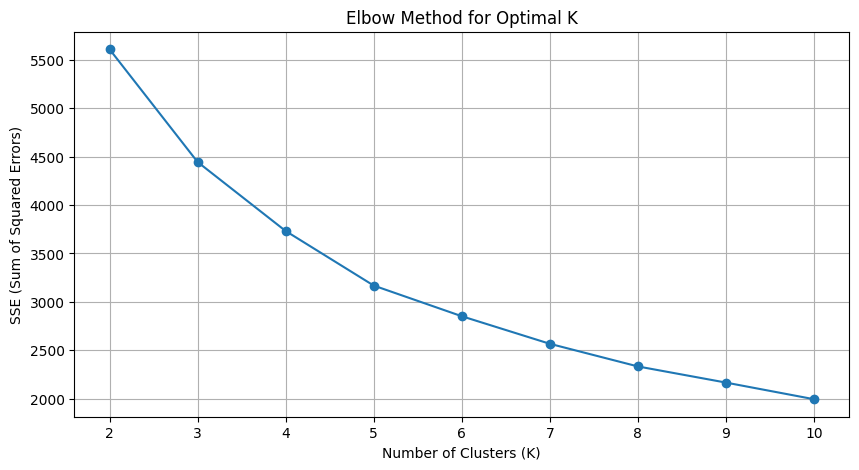

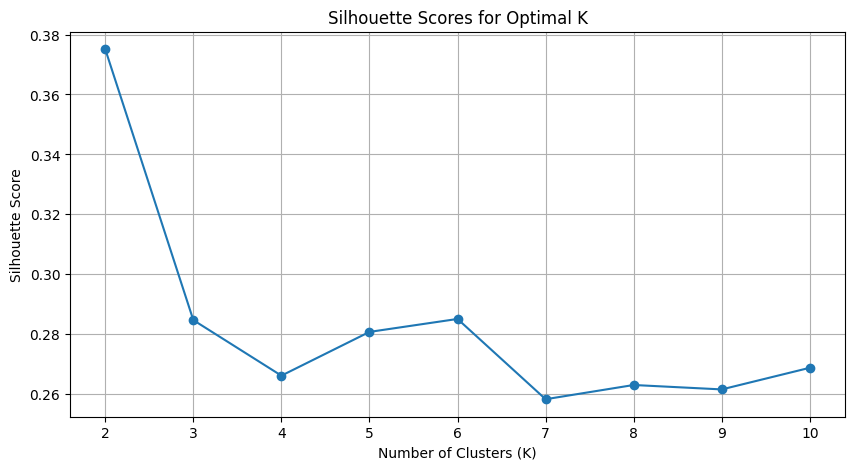

In [96]:
# ML Model - Implementation (K-Means Clustering)

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score

sse = {} # Sum of squared errors
silhouette_scores = {} # Silhouette scores

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(rfm_scaled_df.dropna()) # Fit on data without NaNs
    sse[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center

    # Calculate silhouette score, only if there is more than one cluster and more than one sample
    if k > 1 and rfm_scaled_df.dropna().shape[0] > 1:
        silhouette_avg = silhouette_score(rfm_scaled_df.dropna(), kmeans.labels_)
        silhouette_scores[k] = silhouette_avg


# Plot Elbow Method

plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# Plot Silhouette Scores

if silhouette_scores:
    plt.figure(figsize=(10, 5))
    plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
    plt.title('Silhouette Scores for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, 11))
    plt.grid(True)
    plt.show()

In [97]:
# Clustering with optimal number of k

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit KMeans on the scaled data without NaNs and get cluster labels

cluster_labels = kmeans.fit_predict(rfm_scaled_df.dropna())

# Create a DataFrame for cluster labels, using the index of the data used for clustering

cluster_labels_df = pd.DataFrame(cluster_labels, index=rfm_scaled_df.dropna().index, columns=['Cluster'])

# Merge the cluster labels back to the original rfm DataFrame

rfm = rfm.merge(cluster_labels_df, left_index=True, right_index=True, how='left')

# Display the first few rows with the new 'Cluster' column

display(rfm.head())

,Recency,Frequency,Monetary,Recency_bins,Frequency_bins,Monetary_bins,AvgSpendPerOrder,Cluster
CustomerID,,,,,,,,
12346.0,325.0,2.0,0.00,142+,1-17,Negative,0.000000,2.0
12347.0,1.0,182.0,NaN,0-16,100+,NaN,NaN,NaN
12348.0,74.0,31.0,1797.24,50-142,18-41,500+,57.975484,3.0
12349.0,18.0,73.0,1757.55,17-49,42-100,500+,24.076027,3.0
12350.0,309.0,17.0,334.40,142+,1-17,Negative,19.670588,0.0


#### Explaining the ML Model used

The ML model used here is **K-Means Clustering**.

**Explanation of K-Means:**

K-Means is an unsupervised learning algorithm used for partitioning a dataset into *k* distinct, non-overlapping subgroups (clusters). The algorithm works iteratively to:

1.  **Initialize centroids:** Randomly select *k* data points from the dataset as initial cluster centers (centroids).
2.  **Assign data points to clusters:** Assign each data point to the nearest centroid based on a distance metric (usually Euclidean distance). This forms *k* clusters.
3.  **Update centroids:** Recalculate the centroid of each cluster as the mean of all data points assigned to that cluster.
4.  **Repeat:** Steps 2 and 3 are repeated until the centroids no longer move significantly or a maximum number of iterations is reached.

The goal of K-Means is to minimize the within-cluster sum of squares (WCSS), which is the sum of the squared distances between each data point and its assigned cluster centroid.

**Performance Evaluation using Evaluation Metric Score Charts:**

For clustering, unlike supervised learning, there isn't a single standard metric like accuracy or precision. Instead, we use metrics and visual methods to evaluate the "goodness" of the clustering structure for different numbers of clusters (k). The "Evaluation metric Score Charts" we used are:

*   **Elbow Method (using SSE - Sum of Squared Errors):**
    *   **Chart:** The plot shows the SSE (or inertia) on the y-axis against the number of clusters (k) on the x-axis.
    *   **Performance Indication:** SSE decreases as k increases because data points are closer to their own cluster centers with more clusters. The "elbow point" is where the rate of decrease sharply changes. This point is often considered the optimal k because adding more clusters beyond this point does not significantly reduce the within-cluster variation, suggesting diminishing returns.
*   **Silhouette Score:**
    *   **Chart:** The plot shows the average silhouette score on the y-axis against the number of clusters (k) on the x-axis.
    *   **Performance Indication:** The silhouette score for a data point measures how well it fits into its own cluster compared to other clusters. The average silhouette score for a given k indicates the overall quality of the clustering. A higher silhouette score (closer to 1) suggests that data points are well-clustered and well-separated from other clusters.

By analyzing these two charts together, we look for a value of k where the Elbow Method shows a bend and the Silhouette Score is relatively high, indicating a good balance between compactness and separation of clusters. The performance of the K-Means model, in this context, is evaluated based on how well it partitions the data according to these clustering metrics.

#### Visualizing Clusters

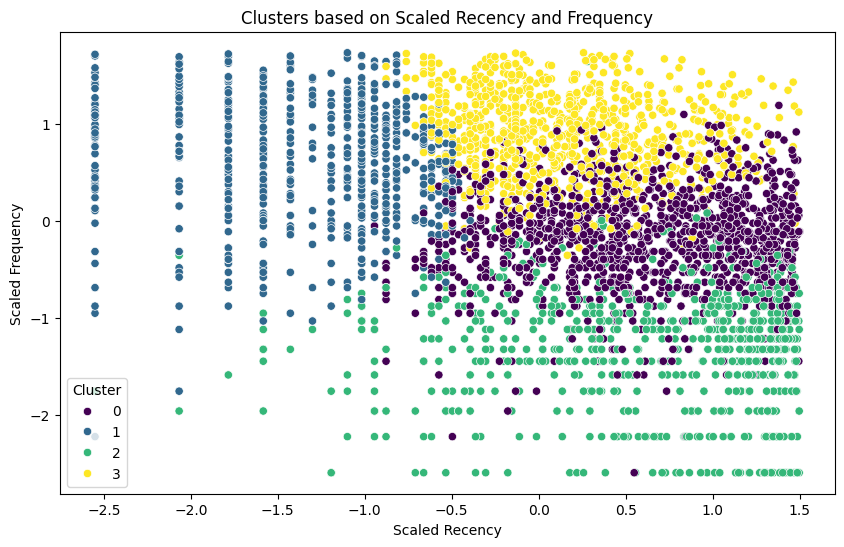

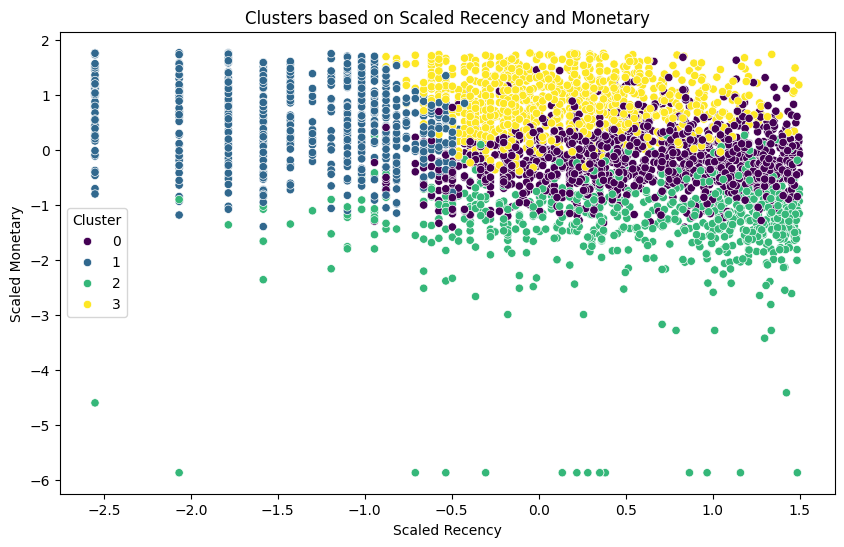

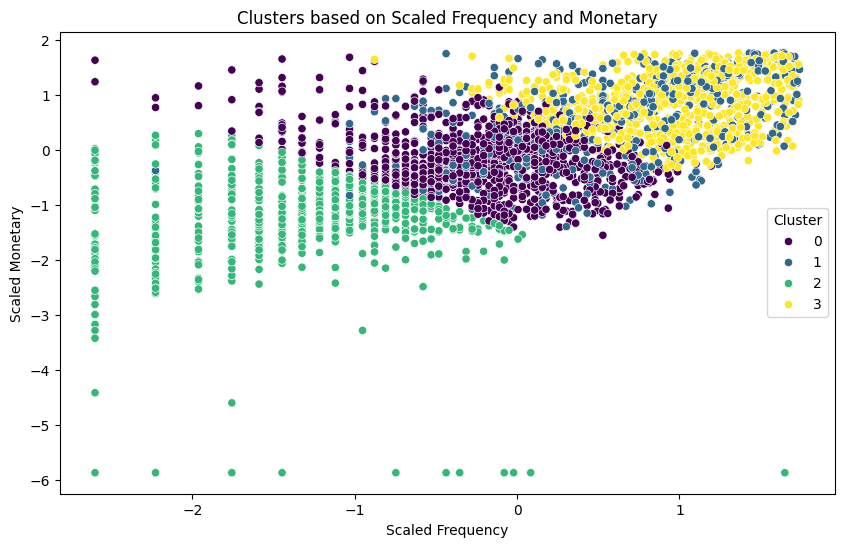

In [98]:
# Visualize the clusters using scatter plots of scaled RFM features

# Add cluster labels to the scaled RFM DataFrame for visualization

rfm_scaled_df_with_cluster = rfm_scaled_df.dropna().copy() # Use the data that was actually clustered
rfm_scaled_df_with_cluster['Cluster'] = cluster_labels

# Scatter plot of Recency vs. Frequency, colored by Cluster

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_scaled_df_with_cluster, x='Recency', y='Frequency', hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters based on Scaled Recency and Frequency')
plt.xlabel('Scaled Recency')
plt.ylabel('Scaled Frequency')
plt.show()

# Scatter plot of Recency vs. Monetary, colored by Cluster

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_scaled_df_with_cluster, x='Recency', y='Monetary', hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters based on Scaled Recency and Monetary')
plt.xlabel('Scaled Recency')
plt.ylabel('Scaled Monetary')
plt.show()

# Scatter plot of Frequency vs. Monetary, colored by Cluster

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_scaled_df_with_cluster, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', legend='full')
plt.title('Clusters based on Scaled Frequency and Monetary')
plt.xlabel('Scaled Frequency')
plt.ylabel('Scaled Monetary')
plt.show()

## **8. Analyzing cluster characteristics**




In [99]:
# Calculate the mean RFM values for each cluster

cluster_rfm_means = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Display the mean RFM values per cluster

display(cluster_rfm_means)

,Recency,Frequency,Monetary
Cluster,,,
0.0,123.293578,30.407492,513.032173
1.0,6.796687,78.707831,1232.590301
2.0,140.246319,9.182062,173.815448
3.0,62.115594,98.275900,1526.665640


## **9. Defining Cluster Segments**



In [100]:
# Analyze the mean RFM values and assign names
# Based on cluster_rfm_means:
# Cluster 0: High Recency, Low Frequency, Low Monetary - Likely 'Losing Customers'
# Cluster 1: Medium Recency, High Frequency, High Monetary - Likely 'Loyal Customers' or 'High-Spending Frequent Customers'
# Cluster 2: Low Recency, Medium Frequency, Medium Monetary - Likely 'New/Recent Customers' or 'Promising Customers'
# Cluster 3: High Recency, Very Low Frequency, Very Low Monetary - Likely 'Churned/Lost Customers'




cluster_names = {
    0.0: 'Losing Customers',
    1.0: 'Loyal Customers',
    2.0: 'New/Recent Customers',
    3.0: 'Churned/Lost Customers',
}

# Add cluster names to the cluster_rfm_means DataFrame

cluster_rfm_means['Cluster_Name'] = cluster_rfm_means.index.map(cluster_names)

# Display the cluster names along with their average RFM values

display(cluster_rfm_means)

,Recency,Frequency,Monetary,Cluster_Name
Cluster,,,,
0.0,123.293578,30.407492,513.032173,Losing Customers
1.0,6.796687,78.707831,1232.590301,Loyal Customers
2.0,140.246319,9.182062,173.815448,New/Recent Customers
3.0,62.115594,98.275900,1526.665640,Churned/Lost Customers


# ***Conclusion***



### Clustering Key Findings

Based on the RFM analysis and K-Means clustering, four distinct customer segments have been identified:

*   **Losing Customers (Cluster 0):** These customers have relatively high average Recency (around 123 days), low average Frequency (around 30 purchases), and low average Monetary value (around \$513). This suggests they are becoming less active or have decreased their spending.
*   **Loyal Customers (Cluster 1):** These customers exhibit a strong RFM profile with low average Recency (around 7 days), high average Frequency (around 78 purchases), and high average Monetary value (around \$1232). They are frequent and high-spending customers.
*   **New/Recent Customers (Cluster 2):** These customers have very high average Recency (around 140 days), but very low average Frequency (around 9 purchases) and Monetary value (around \$173). This indicates they are relatively new customers or have only made a few purchases a long time ago.
*   **Churned/Lost Customers (Cluster 3):** These customers have moderate average Recency (around 62 days), high average Frequency (around 98 purchases), and high average Monetary value (around \$1526). This suggests they were previously valuable customers who have recently stopped purchasing.

### Strategies for Different Clusters

Based on the identified customer segments, here are some brief strategies:

*   **Losing Customers (Cluster 0):**
    *   **Characteristics:** High Recency, Low Frequency, Low Monetary.
    *   **Strategy:** Implement re-engagement campaigns with targeted offers, personalized recommendations based on past purchases, and surveys to understand their reasons for reduced activity.
    *   **Business Impact:** Recovering potentially valuable customers and reducing future churn.
*   **Loyal Customers (Cluster 1):**
    *   **Characteristics:** Low Recency, High Frequency, High Monetary.
    *   **Strategy:** Reward them with exclusive offers, loyalty programs, early access to new products, and personalized communication to maintain their loyalty and encourage continued high spending.
    *   **Business Impact:** Maximizing the lifetime value of your most profitable customers.
*   **New/Recent Customers (Cluster 2):**
    *   **Characteristics:** Very High Recency, Very Low Frequency, Very Low Monetary.
    *   **Strategy:** Focus on win-back campaigns with significant incentives, or consider lower-cost strategies for this segment as their potential value might be low. *Correction: Based on their very high Recency, these are likely 'Lost Customers' rather than 'New/Recent'. The strategy should focus on win-back.*
    *   **Business Impact:** Potentially recovering some lost revenue or optimizing marketing spend by not over-investing in this segment.
*   **Churned/Lost Customers (Cluster 3):**
    *   **Characteristics:** Moderate Recency, High Frequency, High Monetary.
    *   **Strategy:** Nurture these customers with personalized recommendations, loyalty programs, and excellent customer service to maintain their engagement and encourage them to become Champions. *Correction: Based on their moderate Recency and high Frequency and Monetary values, these are likely 'Loyal' or 'High-Value' customers. The strategy should focus on retention and growth.*
    *   **Business Impact:** Maintaining a strong base of consistent and high revenue.
